In [342]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yt
from yt.units import kpc, Msun
import matplotlib.colors as colors
%config InlineBackend.figure_format = 'retina'

In [343]:
#IDs for M31 analogs with not major merger in the last 8 Gyr and a stellar mass cut of 5e10-2e11 applied
ids = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt')

In [344]:
id = int(ids[0])
ppx, ppy, ppz, ppvx, ppvy, ppvz, ppm, ppage, ppgz = np.loadtxt('../data/M31analog_%s_star_properties_rotated.txt'%id, usecols=(0, 1, 2, 3, 4, 5, 6, 7,8), unpack = True)

ppx = ppx[ppage > 0.]
ppy = ppy[ppage > 0.]
ppz = ppz[ppage > 0.]
ppm = ppm[ppage > 0.]
ppage = ppage[ppage > 0.]
ppgz = np.abs(ppgz[ppage > 0.])



data = {'particle_position_x': ppx/0.704,
        'particle_position_y': ppy/0.704,
        'particle_position_z': ppz/0.704,
        'particle_mass': ppm/0.704,
        'particle_age': ppage,
        'Metallicity':ppgz}

bbox = 1.5*np.array([[min(ppx), max(ppx)], [min(ppy), max(ppy)], [min(ppz), max(ppz)]])
ds = yt.load_particles(data, length_unit=kpc, mass_unit=1e10*Msun, n_ref=128, bbox=bbox)
len(ppx)
np.min(ppgz), np.max(ppgz)

/Users/ektapatel/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 60212 but corresponding boolean dimension is 60168
  if __name__ == '__main__':
yt : [INFO     ] 2018-07-30 15:18:59,202 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-30 15:18:59,203 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-07-30 15:18:59,204 Parameters: domain_left_edge          = [-320.23711306 -259.60362206 -721.56021541]
yt : [INFO     ] 2018-07-30 15:18:59,206 Parameters: domain_right_edge         = [ 486.6826055   370.57011901  586.68580519]
yt : [INFO     ] 2018-07-30 15:18:59,208 Parameters: cosmological_simulation   = 0.0


(0.0, 0.10052229464054108)

In [345]:
ds.derived_field_list

yt : [INFO     ] 2018-07-30 15:18:59,220 Allocating for 6.017e+04 particles (index particle type 'all')
yt : [INFO     ] 2018-07-30 15:18:59,237 Identified 1.945e+03 octs


[('all', 'Metallicity'),
 ('all', 'mesh_id'),
 ('all', 'particle_age'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radius'),
 ('all', 'particle_spherical_position_phi'),
 ('all', 'particle_spherical_position_radius'),
 ('all', 'particle_spherical_position_theta'),
 ('deposit', 'all_cic'),
 ('deposit', 'all_count'),
 ('deposit', 'all_density'),
 ('deposit', 'all_mass'),
 ('deposit', 'io_c

yt : [INFO     ] 2018-07-30 15:18:59,530 xlim = -403.459859 403.459859
yt : [INFO     ] 2018-07-30 15:18:59,531 ylim = -315.086871 315.086871
yt : [INFO     ] 2018-07-30 15:18:59,533 xlim = -403.459859 403.459859
yt : [INFO     ] 2018-07-30 15:18:59,534 ylim = -315.086871 315.086871
yt : [INFO     ] 2018-07-30 15:18:59,537 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800
yt : [INFO     ] 2018-07-30 15:19:00,119 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



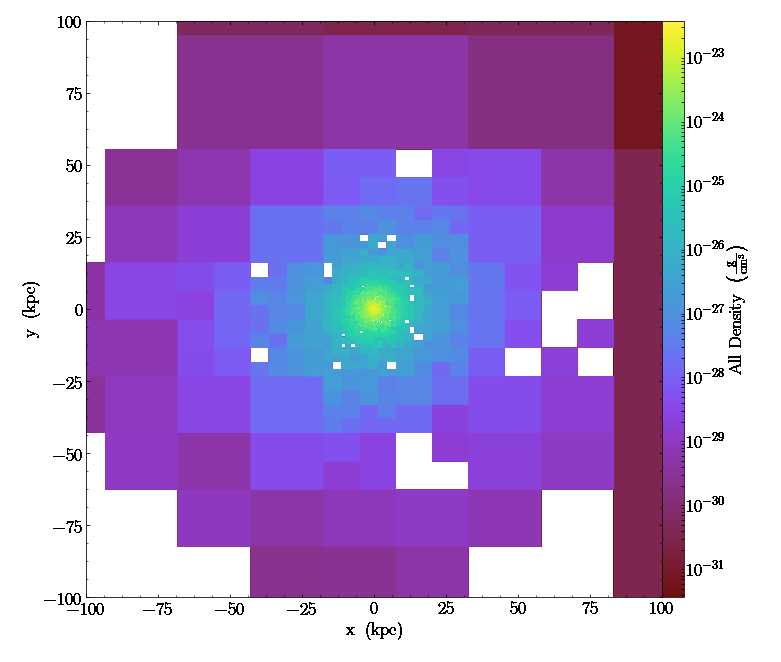

In [346]:
slc = yt.SlicePlot(ds, 2,'all_density',center=[0.,0.,0.])
slc.set_width((200, 'kpc'))

yt : [INFO     ] 2018-07-30 15:19:00,979 xlim = -100.000000 100.000000
yt : [INFO     ] 2018-07-30 15:19:00,981 ylim = -100.000000 100.000000
yt : [INFO     ] 2018-07-30 15:19:00,984 xlim = -100.000000 100.000000
yt : [INFO     ] 2018-07-30 15:19:00,985 ylim = -100.000000 100.000000
yt : [INFO     ] 2018-07-30 15:19:00,987 Splatting (('all', 'Metallicity')) onto a 800 by 800 mesh



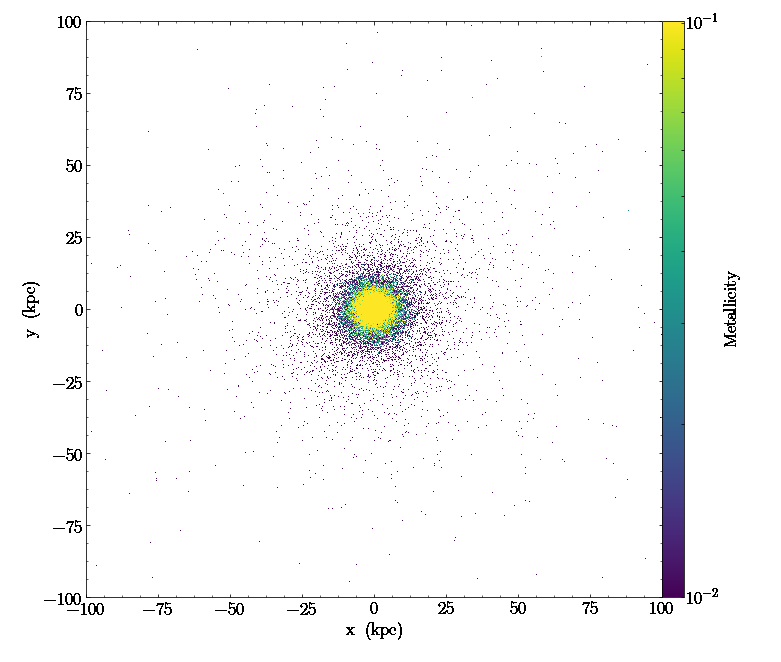

In [347]:
#prj = yt.ProjectionPlot(ds, 2, 'particle_age', width=100*kpc)
#slc = yt.SlicePlot(ds, 2,'particle_z')
#slc.set_width((200, 'kpc'))

p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'Metallicity', center=[0.,0.,0.], width=200*kpc)
p.set_cmap('Metallicity', 'viridis')
p.set_zlim('Metallicity', 1e-2, np.max(ppgz))


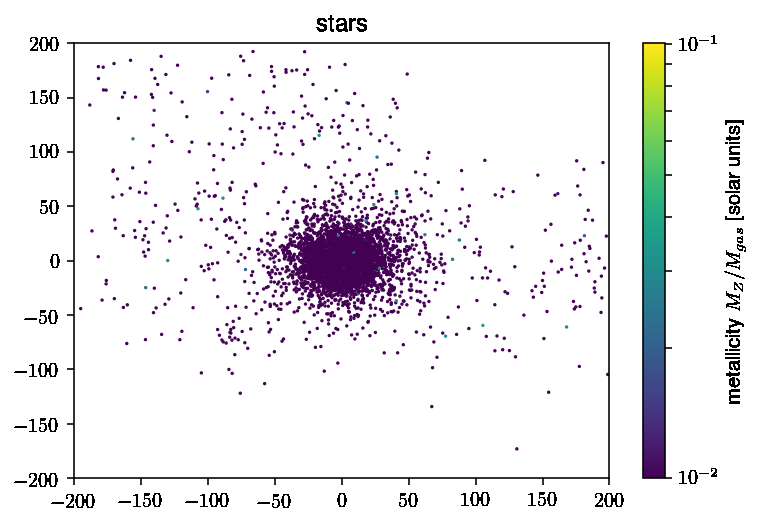

In [348]:
import matplotlib.colors as colors
plt.scatter(ppx, ppy, c=ppgz, marker='.', s=2,norm=colors.LogNorm(vmin=1e-2, vmax=np.max(ppgz)))
plt.colorbar(label=r'metallicity $M_Z/M_{gas}$ [solar units]')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.title('stars')

In [349]:
ppx, ppy, ppz, ppvx, ppvy, ppvz, ppm, ppnh, ppsfr, ppgz = np.loadtxt('../data/M31analog_%s_gas_properties_rotated.txt'%id, usecols=(0, 1, 2, 3, 4, 5, 6, 7,8,9), unpack = True)

data = {'particle_position_x': ppx/0.704,
        'particle_position_y': ppy/0.704,
        'particle_position_z': ppz/0.704,
        'particle_mass': ppm/0.704,
        'particle_nh': ppnh,
        'Metallicity':ppgz,
        'SFR': ppsfr}

bbox = [[-1000.0, 1000.0], [-1000.0, 1000.0], [-1000.0, 1000.0]]
ds = yt.load_particles(data, length_unit=kpc, mass_unit=1e10*Msun, n_ref=64, bbox=bbox)
len(ppx)

yt : [INFO     ] 2018-07-30 15:19:06,098 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-30 15:19:06,100 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-07-30 15:19:06,101 Parameters: domain_left_edge          = [-1000. -1000. -1000.]
yt : [INFO     ] 2018-07-30 15:19:06,103 Parameters: domain_right_edge         = [ 1000.  1000.  1000.]
yt : [INFO     ] 2018-07-30 15:19:06,105 Parameters: cosmological_simulation   = 0.0


11433

yt : [INFO     ] 2018-07-30 15:19:06,119 Allocating for 1.143e+04 particles (index particle type 'all')
yt : [INFO     ] 2018-07-30 15:19:06,125 Identified 1.033e+03 octs
yt : [INFO     ] 2018-07-30 15:19:06,401 xlim = -1000.000000 1000.000000
yt : [INFO     ] 2018-07-30 15:19:06,403 ylim = -1000.000000 1000.000000
yt : [INFO     ] 2018-07-30 15:19:06,405 xlim = -1000.000000 1000.000000
yt : [INFO     ] 2018-07-30 15:19:06,406 ylim = -1000.000000 1000.000000
yt : [INFO     ] 2018-07-30 15:19:06,408 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800
yt : [INFO     ] 2018-07-30 15:19:06,898 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



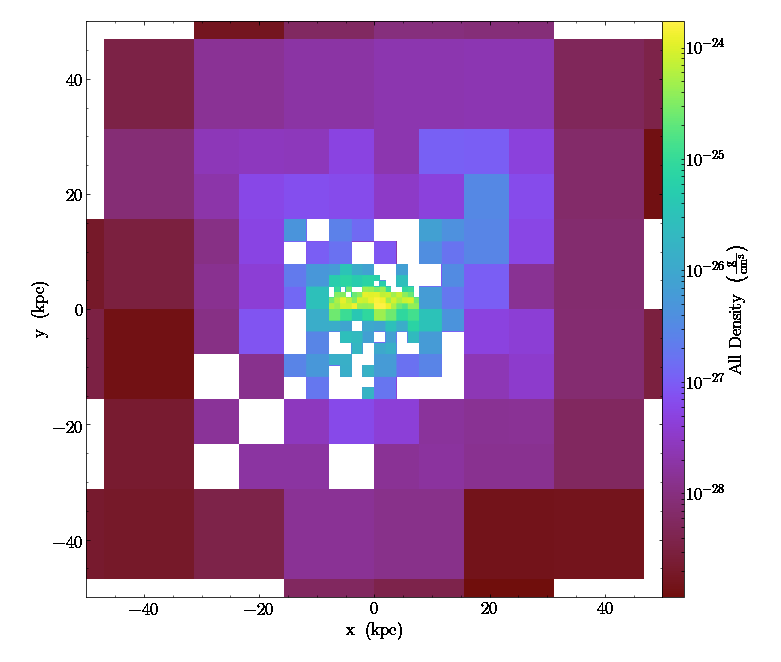

In [350]:
slc = yt.SlicePlot(ds, 2,'all_density',center=[0.,0.,0.])
slc.set_width((100, 'kpc'))

yt : [INFO     ] 2018-07-30 15:19:07,600 xlim = -10.000000 10.000000
yt : [INFO     ] 2018-07-30 15:19:07,601 ylim = -10.000000 10.000000
yt : [INFO     ] 2018-07-30 15:19:07,604 xlim = -10.000000 10.000000
yt : [INFO     ] 2018-07-30 15:19:07,605 ylim = -10.000000 10.000000
yt : [INFO     ] 2018-07-30 15:19:07,607 Splatting (('all', 'SFR')) onto a 800 by 800 mesh



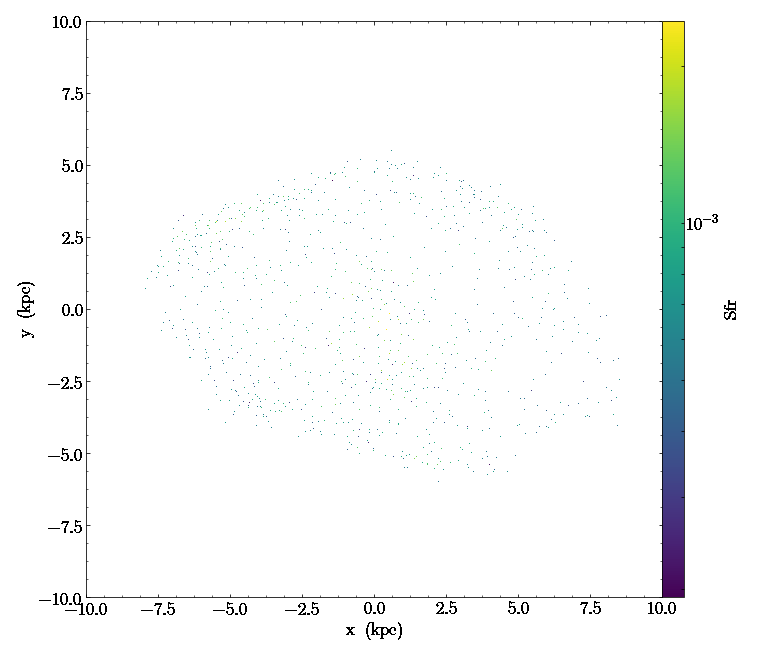

In [351]:
p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'SFR', center=[0.,0.,0.], width=20*kpc)
p.set_cmap('SFR', 'viridis')
#p.set_zlim('Metallicity', 1e-2, np.max(ppgz))

(-216.23668755444334, 185.42544117907286)

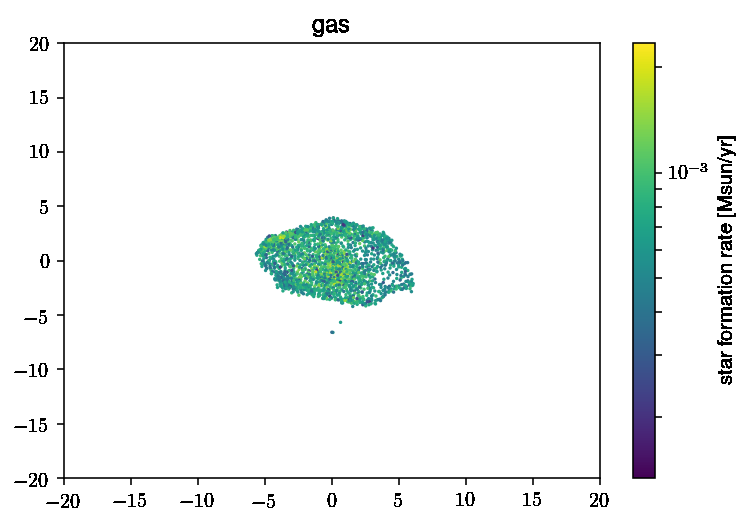

In [352]:
plt.scatter(ppx, ppy, c=ppsfr, marker='.', s=2,norm=colors.LogNorm())
plt.colorbar(label='star formation rate [Msun/yr]')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title('gas')
np.min(ppy), np.max(ppy)
